# **Simple Linear Regression**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
np.random.seed(20)

n = 10

X = np.random.randint(1, 15, size=n).reshape(-1, 1)
print(X)

[[ 4]
 [11]
 [13]
 [11]
 [10]
 [ 5]
 [12]
 [ 7]
 [ 8]
 [ 3]]


In [ ]:
noise = np.random.uniform(-0.3, 0.3, size=n)

y = 4 * X.flatten() + 1 + noise

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(X_train)
print(y_train)
print(X_test)
print(y_test)


[[ 4]
 [ 7]
 [13]
 [ 3]
 [10]
 [11]
 [12]]
[16.92720857 29.21019658 53.09477088 12.72199858 40.86338984 44.81631013
 49.16980217]
[[ 8]
 [11]
 [ 5]]
[33.16514694 45.01110657 21.13116356]


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_acc = model.score(X_train, y_train) * 100
test_acc = model.score(X_test, y_test) * 100

print("Train Accuracy (%):", train_acc)
print("Test Accuracy (%):", test_acc)
print("Difference (%):", abs(train_acc - test_acc))

Train Accuracy (%): 99.98861524536669
Test Accuracy (%): 99.96635590477872
Difference (%): 0.02225934058796497


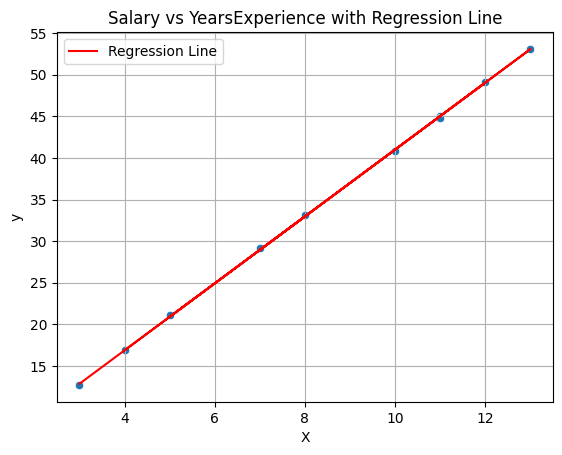

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# df = pd.read_csv('Salary_dataset.csv')
df = pd.DataFrame({'X': X.flatten(), 'y': y})
sns.scatterplot(x=df['X'], y=df['y'])
from sklearn.linear_model import LinearRegression
plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.title('Salary vs YearsExperience with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Train Accuracy (%): 98.67436534272451
Test Accuracy (%): 96.00684597797655
Difference (%): 2.6675193647479603


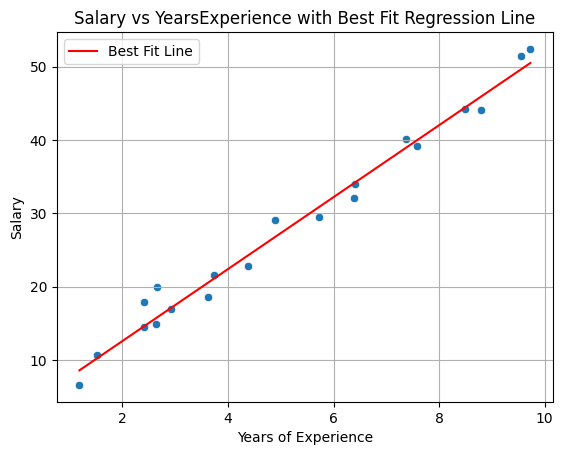

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)

n = 20

X = np.random.uniform(1, 10, size=n).reshape(-1, 1)

noise = np.random.normal(loc=0, scale=2.0, size=n)

y = 5 * X.flatten() + 3 + noise

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train) * 100
test_acc = model.score(X_test, y_test) * 100

print("Train Accuracy (%):", train_acc)
print("Test Accuracy (%):", test_acc)
print("Difference (%):", abs(train_acc - test_acc))

X_sorted = np.sort(X, axis=0)
y_pred_sorted = model.predict(X_sorted)

df = pd.DataFrame({'X': X.flatten(), 'y': y})

sns.scatterplot(x='X', y='y', data=df)
plt.plot(X_sorted, y_pred_sorted, color='red', label='Best Fit Line')

plt.title('Salary vs YearsExperience with Best Fit Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


# **Multi Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_diabetes(as_frame=True)
df = data.frame

X = df.drop(columns='target')
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
train_acc = model.score(X_train_scaled, y_train) * 100
test_acc = model.score(X_test_scaled, y_test) * 100

print("Train Accuracy (R² %):", train_acc)
print("Test Accuracy (R² %):", test_acc)
print("Difference (%):", abs(train_acc - test_acc))

Train Accuracy (R² %): 52.791938633614976
Test Accuracy (R² %): 45.26027629719197
Difference (%): 7.531662336423004


# **Multi Linear Regression With Better Score**

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [9]:
df = pd.read_csv('50_Startups.csv')
df.head()
mularrx = df.drop(['Profit','State'], axis=1)
mularry = df['Profit']


In [10]:
train_x,test_x,train_y,test_y = train_test_split(mularrx,mularry,test_size=0.2,random_state=42)




In [11]:
model = LinearRegression().fit(train_x,train_y)
model.score(train_x,train_y)


0.9535927757257411

In [13]:
from sklearn.metrics import root_mean_squared_error

In [15]:
y_pred = model.predict(test_x)


In [17]:
rmse = root_mean_squared_error(test_y, y_pred)
print("Root Mean Square Error (RMSE):", rmse)
accuracy = r2_score(test_y,y_pred)
print(accuracy)

Root Mean Square Error (RMSE): 8995.905803361415
0.9000653083037321


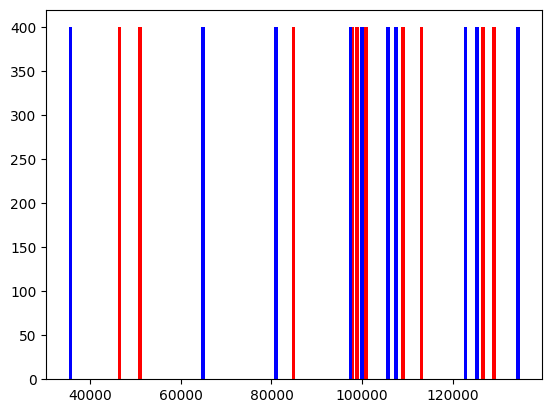

In [19]:
import matplotlib.pyplot as plt

plt.bar(y_pred,height=400,width=800,color='r')
plt.bar(test_y,height=400,width=800,color='b')
plt.show()


In [22]:
y_train_pred = model.predict(train_x)
train_r2 = r2_score(train_y, y_train_pred)
test_r2 = r2_score(test_y, y_pred)

print("Training R²:", train_r2)
print("Testing R²:", test_r2)

print("Training Accuracy (%):", train_r2 * 100)
print("Testing Accuracy (%):", test_r2 * 100)

Training R²: 0.9535927757257411
Testing R²: 0.9000653083037321
Training Accuracy (%): 95.35927757257411
Testing Accuracy (%): 90.00653083037321
